### Parallelization

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")

### Langsmith tracking
os.environ['LANGCHAIN_API_KEY'] = os.getenv("LANGCHAIN_API_KEY")
os.environ['LANGCHAIN_TRACING_V2'] = "true"
os.environ['LANGCHAIN_PROJECT'] = os.getenv("LANGCHAIN_PROJECT")

In [2]:
### initialize the llm model
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [7]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [8]:
## Defining the nodes

def generate_characters(state:State):
    """Generate character descriptions"""
    msg = llm.invoke(f"Create two character names and brief traits for a story about {state["topic"]}")
    return {"characters": msg.content}


def generate_setting(state:State):
    """Generate story setting"""
    msg = llm.invoke(f"Describe a vivid setting for a story about {state["topic"]}")
    return {"settings": msg.content}


def generate_premises(state:State):
    """Generate story premise"""
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state["topic"]}")
    return {"premises": msg.content}


def combine_elements(state:State):
    """Combine characters, setting, and premise into an intro"""
    msg = llm.invoke(
        f"write a short story introduction using these elements:\n"
        f"Characters: {state["characters"]}\n"
        f"Setting: {state["settings"]}\n"
        f"Premise: {state["premises"]}\n"
    )
    return {"story_intro": msg.content}

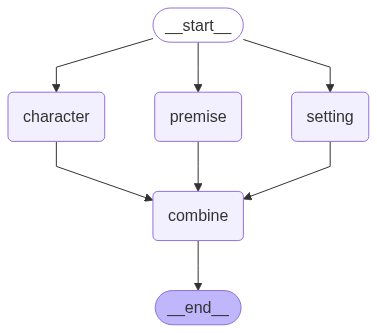

In [9]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

## Creating the graph
builder = StateGraph(State)

## Adding the Node
builder.add_node("character", generate_characters)
builder.add_node("setting", generate_setting)
builder.add_node("premise", generate_premises)
builder.add_node("combine", combine_elements)

## Adding the Edges
builder.add_edge(START, "character")
builder.add_edge(START, "setting")
builder.add_edge(START, "premise")
builder.add_edge("character", "combine")
builder.add_edge("setting", "combine")
builder.add_edge("premise", "combine")
builder.add_edge("combine", END)

## Compile the Graph
graph_builder = builder.compile()

## View the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
state = {"topic":"time travel"}
result = graph_builder.invoke(state)
result

{'topic': 'time travel',
 'characters': '**Eleanor "Ellie" Whitley**  \nEllie is a brilliant but somewhat eccentric theoretical physicist who has dedicated her life to the study of time travel. In her early thirties, she is fiercely intelligent, with a mind that races through possibilities and scenarios with unmatched speed. She has a mischievous streak and often sees the world as one big puzzle to solve. Her dark, curly hair is always a bit unkempt, and her round glasses perched on the tip of her nose give her the appearance of a modern-day Einstein. Beneath her playful exterior, Ellie is motivated by a personal quest to understand a family mystery that has haunted her for years.\n\n**Jonathan "Jax" Rigby**  \nJax is a courageous and resourceful historian with a penchant for adventure. In his late twenties, he specializes in ancient civilizations and possesses a deep appreciation for the nuances of history. Known for his charismatic personality and quick wit, Jax is equally at ease de